# 2016_2017 Oefening DB creation & querying 
## Queries op 1 tabel: group by, distinct, sum, count, having

Voordat je met een database oefening kunt starten, moet er een connectie worden gemaakt met de juiste database. De regel script staat al in het Notebook, maar die moet je wel uitvoeren.

In [1]:
%connect sqlquiz

"Connected sqlquiz, SQL Notebook 1.2, 2017-2023, MIT License"


Voordat je de oefeningen kunt maken moet je aangeven wie je bent door je studentnummer achter %user in te vullen en de code in de cel uit te voeren. Bijvoorbeeld %user 12345678 

Je kunt de tabellen in een oefen database bekijken met %tables, en de structuur van een tabel met %show

# De datasets

In de database SQLQUIZ staan twee aparte cases.

<a id=project></a>
## Case: PROJECT

In de case PROJECT staan 4 tabellen: medewerker, functie, project, werkt. Die gaan over de inzet van medewerkers op projecten. De case PROJECT wordt ook in de reader gebruikt.

<img src='project.png'>

<a id=burgerzaken></a>
## Case: BURGERZAKEN

In de case BURGERZAKEN staan 3 tabellen: burger, vergunning en aanvraag, waarin wordt bijgehouden welke burger welke vergunningen heeft aangevraagd.

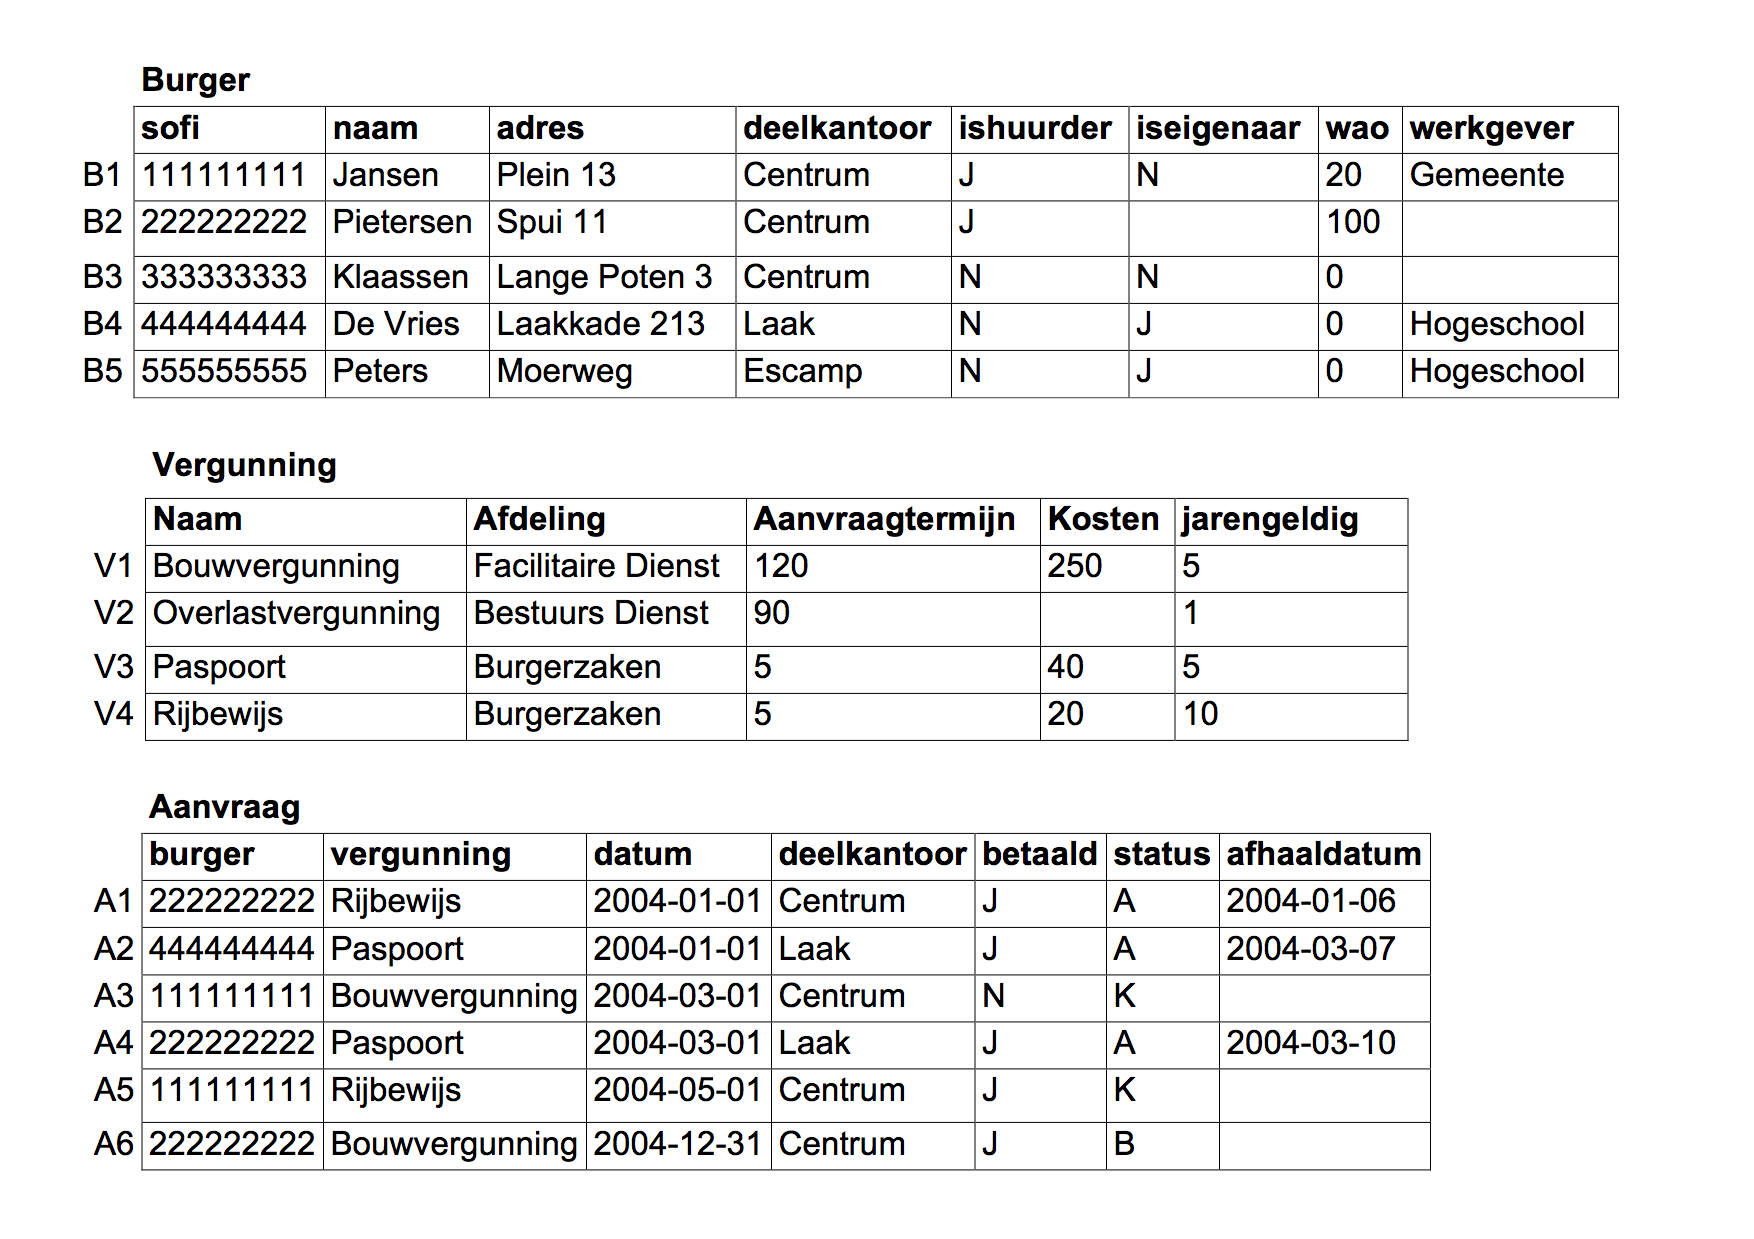<img src='burgerzaken.png'>

## SELECT en FROM

Met FROM geef je aan uit welke tabel de gegevens worden getoond. FROM bepaald daarmee het maximaal aantal rijen dat getoond wordt, namelijk alle rijen die in de tabel zijn opgeslagen. Met SELECT kun je opgeven welke kolommen er getoond worden. Naast kolommen kun je met SELECT ook expressies opgeven die worden berekend. 

#### Opdracht 1

Op <a href=#project>project</a>, toon van alle mederwerkers het nr.
Voorbeeld: Je kunt zien wat er uit een correcte query moet komen door de cel met %output 1 te runnen
Plaats je query in de cel onder %%uitwerking 1:
```
%%uitwerking 1
SELECT nr
FROM medewerker
```

En run de cel

In [2]:
%output 1

In [3]:
%%uitwerking 1
SELECT nr
FROM medewerker

#### Opdracht 2

Op <a href=#project>project</a>, toon van alle projecten de naam van het bedrijf.

In [4]:
%output 2

In [5]:
%%uitwerking 2
SELECT bedrijf
FROM project

#### Opdracht 3

Op <a href=#project>project</a>, toon van alle medewerkers hun woonplaats

In [6]:
%output 3

In [7]:
%%uitwerking 3
SELECT woonplaats
FROM medewerker

#### Opdracht 4

Op <a href=#project>project</a>, toon van alle projecten de naam en het nr van de projectleider	

In [8]:
%output 4

In [9]:
%%uitwerking 4
SELECT naam, projectleider
FROM project

## DISTINCT

DISTINCT zorgt ervoor dat elke rij in de uitvoer uniek is, dubbele rijen worden eruit gehaald. Merk op dat een rij alleen dubbel is als de hele rij gelijk is, dus niet alleen de eerste kolom.

#### Opdracht 5

Op <a href=#project>project</a>, toon de woonplaatsen waar medewerkers wonen.

In [10]:
%output 5

In [11]:
%%uitwerking 5
SELECT DISTINCT woonplaats
FROM medewerker

#### Opdracht 6

Op <a href=#burgerzaken>burgerzaken</a>, toon van alle burgers de naam en of ze huurder zijn

In [12]:
%output 6

In [13]:
%%uitwerking 6
SELECT naam, ishuurder
FROM burger

#### Opdracht 9

Op <a href=#project>project</a>, strikvraag: toon voor elke medewerker "Leiden"	

In [14]:
%output 9

In [15]:
%%uitwerking 9
SELECT 'Leiden'
FROM medewerker

#### Opdracht 10

Op <a href=#project>project</a>, toon voor elke medewerker hun naam en daarachter "Leiden"	

In [16]:
%output 10

In [17]:
%%uitwerking 10
SELECT naam, 'Leiden'
FROM medewerker

## WHERE

Met de WHERE-clausule kun je rijen uitfilteren. Je geeft achter WHERE een expressie op die voor elke rij wordt geevalueerd. Levert de expressie True op dan wordt die getoond en anders niet. Je mag verschillende expressies combineren met AND en OR.

#### Opdracht 11

Op <a href=#project>project</a>, toon van alle medewerkers uit Leiden de naam

In [18]:
%output 11

In [19]:
%%uitwerking 11
SELECT naam
FROM medewerker
WHERE woonplaats == 'Leiden'

#### Opdracht 12

Op <a href=#project>project</a>, toon van alle medewerkers uit Leiden de functiecode	

In [20]:
%output 12

In [21]:
%%uitwerking 12
SELECT functie
FROM medewerker
WHERE woonplaats == 'Leiden'

#### Opdracht 13

Op <a href=#project>project</a>, toon de woonplaats van de medewerker met nr 13	

In [22]:
%output 13

In [23]:
%%uitwerking 13
SELECT woonplaats
FROM medewerker
WHERE nr == '13'

#### Opdracht 14

Op <a href=#burgerzaken>burgerzaken</a>, toon de naam van alle Vergunningen die Burgerzaken afgeeft

In [24]:
%output 14

In [25]:
%%uitwerking 14
SELECT naam
FROM vergunning
WHERE afdeling == 'Burgerzaken'

#### Opdracht 15

Op <a href=#burgerzaken>burgerzaken</a>, toon het adres van elke burger die onder het deelkantoor Centrum valt

In [26]:
%output 15

In [27]:
%%uitwerking 15
SELECT adres
FROM burger
WHERE deelkantoor == 'Centrum'

#### Opdracht 16

Op <a href=#burgerzaken>burgerzaken</a>, toon de naam van alle huiseigenaren	

In [28]:
%output 16

In [29]:
%%uitwerking 16
SELECT naam
FROM burger
WHERE iseigenaar == 'J'

## NULL

In een database kan een veld ook leeg zijn, dan duiden we dat aan met NULL. In deze oefeningen is elke lege cel een NULL waarde. NULL moet worden geinterpreteerd als 'onbekend' of 'ontbrekend', dus als bij een medewerker een NULL waarde heeft bij woonplaats dan heeft die waarschijnlijk wel een woonplaats, maar die is onbekend. Maar als een medewerker een NULL waarde heeft bij *baas* dan zou het kunnen dat deze medewerker geen baas heeft of dat onbekend is wie hun baas is.

NULL-waarden gedragen zich anders dan je misschien zou verwachten. Elke expressie met een NULL waarde levert de uitkomst NULL (oftewel onbekend) op. Als uiteindelijk in een WHERE clausule een rij wordt geevalueerd dan is NULL niet hetzelfde als True. Het gevolg is dan rijen met onbekende waarden die gebruikt worden in expressies eruit worden gefilterd. Als dat niet de bedoeling is kun je specifiek testen op NULL-waarden met IS NULL en IS NOT NULL.

#### Opdracht 17

Op <a href=#project>project</a>, toon van alle projecten met een projectleider de naam van het bedrijf

In [30]:
%output 17

In [31]:
%%uitwerking 17
SELECT bedrijf
FROM project
WHERE projectleider IS NOT NULL

#### Opdracht 18

Op <a href=#burgerzaken>burgerzaken</a>, toon de vergunningnaam en deelkantoor van alle betaalde aanvragen van deelkantoor Centrum	

In [32]:
%output 18

In [33]:
%%uitwerking 18
SELECT vergunning, deelkantoor
FROM aanvraag
WHERE deelkantoor == 'Centrum' AND betaald == 'J'

## LIKE

Je kunt in tekst waarden kijken of een tekst bepaalde tekens bevat met de LIKE operator. Je kunt aan de LIKE operator een template meegeven waarin een ?-teken staat voor precies 1 willekeurig teken en een %-teken voor 0 of meer willekeurige tekens. Als de tekst matcht geeft de LIKE operator True terug.

#### Opdracht 19

Op <a href=#project>project</a>, toon de naam van alle medewerkers wiens woonplaats met een "L" begint	

In [34]:
%output 19

In [35]:
%%uitwerking 19
Select naam
From medewerker
Where woonplaats like 'L%'

#### Opdracht 20

Op <a href=#project>project</a>, toon de naam van alle medewerkers wiens naam op een "s" eindigt.	

In [36]:
%output 20

In [37]:
%%uitwerking 20
Select naam
From medewerker
Where naam like '%s'

#### Opdracht 21

Op <a href=#project>project</a>, toon de naam van alle medewerkers die een 'a' in hun naam hebben	

In [38]:
%output 21

In [39]:
%%uitwerking 21
Select naam
From medewerker
Where naam like '%a%'

#### Opdracht 22

Op <a href=#project>project</a>, toon de naam van alle medewerkers wiens functiecode niet met een 'P' begint.	

In [40]:
%output 22

In [41]:
%%uitwerking 22
Select naam
From medewerker
Where functie not like 'P%'

#### Opdracht 23

Op <a href=#burgerzaken>burgerzaken</a>, toon de naam van de vergunningen die worden afgegeven door een afdeling waarvan de naam eindigt op 'dienst'	

In [42]:
%output 23

In [43]:
%%uitwerking 23
Select Naam
From Vergunning
Where Afdeling like '%Dienst'

#### Opdracht 24

Op <a href=#project>project</a>, toon de naam van elke medewerker die een baas heeft	

In [44]:
%output 24

In [45]:
%%uitwerking 24
Select naam
From Medewerker
Where baas like '%%'

#### Opdracht 25

Op <a href=#project>project</a>, toon van elke medewerker de naam in hoofdletters (met de functie UPPER() )	

In [46]:
%output 25

In [47]:
%%uitwerking 25
Select upper(naam)
From medewerker

#### Opdracht 26

Op <a href=#burgerzaken>burgerzaken</a>, geef van alle aanvragen sofinr, vergunning en het aantal dagen tussen aanvraag en afhalen (tip: je kunt als expressie datum - datum2 gebruiken om het verschil in aantal dagen te krijgen)

In [48]:
%output 26

In [49]:
%%uitwerking 26
Select burger, vergunning, JULIANDAY(afhaaldatum) - JULIANDAY(datum)
From Aanvraag

## ORDER BY

De rijen kunnen worden gesorteerd met ORDER BY. Je kunt achter ORDER BY een expressies opgeven met daarbij eventueel of er DESC (aflopend) met worden gesorteerd (standaard is oplopend). Je kunt ook meer dan 1 expressie opgeven, dan wordt eerst op de eerste expressie gesorteerd en als de waarde daarvan voor 2 rijen gelijk zijn dan worden die rijen op de volgende expressie(s) verder gesorteerd. 

#### Opdracht 27

Op <a href=#project>project</a>, toon van alle functies de naam, gesorteerd op naam	

In [50]:
%output 27

In [51]:
%%uitwerking 27
Select naam
From Functie
Order by naam

#### Opdracht 28

Op <a href=#burgerzaken>burgerzaken</a>, geef de naam van alle burgers aflopend gesorteerd op adres	

In [52]:
%output 28

In [53]:
%%uitwerking 28
Select naam
From Burger
Order by adres DESC

#### Opdracht 29

Op <a href=#burgerzaken>burgerzaken</a>, geef de naam van alle vergunning gesorteerd op aanvraagtermijn en kosten	

In [54]:
%output 29

In [55]:
%%uitwerking 29
Select naam
From Vergunning
Order by Aanvraagtermijn, Kosten

#### Opdracht 30

Op <a href=#burgerzaken>burgerzaken</a>, geef de naam van alle huurders (burgers) gesorteerd op het percentage arbeidsongeschikt	

In [56]:
%output 30

In [57]:
%%uitwerking 30
Select naam
From Burger
WHERE ishuurder = 'J'
Order by wao

#### Opdracht 31

Op <a href=#project>project</a>, toon de woonplaatsen waar medewerkers wonen (dubbele weghalen, maar NULL-waarden niet)	

In [58]:
%output 31

In [59]:
%%uitwerking 31
Select distinct woonplaats
From Medewerker

#### Opdracht 32

Op <a href=#project>project</a>, toon het nr van elke medewerker die baas is	

In [60]:
%output 32

In [61]:
%%uitwerking 32
Select distinct baas
From Medewerker

#### Opdracht 33

Op <a href=#project>project</a>, geef een overzicht per woonplaats, welke baasnr de medewerkers die daar wonen hebben

In [62]:
%output 33

In [63]:
%%uitwerking 33
SELECT DISTINCT woonplaats, baas
FROM Medewerker
ORDER BY woonplaats, baas

#### Opdracht 34

Op <a href=#burgerzaken>burgerzaken</a>, geef de afdelingen die vergunningen uitgeven waar je minder dan 100 dagen op hoeft te wachten	

In [64]:
%output 34

In [65]:
%%uitwerking 34
SELECT DISTINCT afdeling
FROM Vergunning
WHERE Aanvraagtermijn < 100

#### Opdracht 35

Op <a href=#burgerzaken>burgerzaken</a>, geef de namen van werkgevers van de burgers die geen huurder zijn	

In [66]:
%output 35

In [67]:
%%uitwerking 35
SELECT DISTINCT werkgever
FROM Burger
WHERE ishuurder == 'N'

## Aggregatiefuncties COUNT, SUM, MAX, MIN

Je kunt ook rijen in een tabel samen nemen en daar uitkomsten over berekenen. Bijvoorbeeld de COUNT() functie telt het aantal rijen, de SUM() functie telt alle uitkomsten van een bepaalde expressie bij elkaar op. De MIN() en MAX() functies kun je gebruiken om de hoogste en laagste waarde te vinden. NULL-waarden worden op een bijzondere manier verwerkt: SUM(), MIN() en MAX() negeren NULL waarden, COUNT() telt alleen de rijen waarvoor de expressie geen NULL oplevert.

#### Opdracht 36

Op <a href=#project>project</a>, toon het aantal medewerkers	

In [68]:
%output 36

In [69]:
%%uitwerking 36
SELECT COUNT(naam)
FROM Medewerker

#### Opdracht 37

Op <a href=#project>project</a>, toon het aantal medewerkers waarvan het uurloon bekend is	

In [70]:
%output 37

In [71]:
%%uitwerking 37
SELECT COUNT(uurloon)
FROM Medewerker

#### Opdracht 38

Op <a href=#project>project</a>, toon het aantal medewerkers die een baas hebben	

In [72]:
%output 38

In [73]:
%%uitwerking 38
SELECT COUNT(baas)
FROM Medewerker

#### Opdracht 39

Op <a href=#burgerzaken>burgerzaken</a>, geef het percentage afgehaalde aanvragen (zonder procentteken)	

In [74]:
%output 39

In [75]:
%%uitwerking 39
SELECT 100 * COUNT(afhaaldatum) / COUNT(*)
FROM Aanvraag

#### Opdracht 40

Op <a href=#burgerzaken>burgerzaken</a>, geef het aantal aanvragen in het Centrum	

In [76]:
%output 40

In [77]:
%%uitwerking 40
SELECT SUM(deelkantoor == 'Centrum')
FROM Aanvraag

#### Opdracht 41

Op <a href=#project>project</a>, toon het aantal ingezette FTE's (Full Time Employees) op projecten (Tip: tel de inzet_perc bij elkaar)	

In [78]:
%output 41

In [79]:
%%uitwerking 41
SELECT SUM(inzet_perc) / 100
FROM Werkt

#### Opdracht 42

Op <a href=#burgerzaken>burgerzaken</a>, geef de som van de kosten van alle vergunningen die binnen 6 dagen al kunnen worden afgehaald	

In [80]:
%output 42

In [81]:
%%uitwerking 42
SELECT SUM(Kosten)
FROM Vergunning
Where Aanvraagtermijn < 6

## GROUP BY

Voor het gebruik van aggregatiefuncties geldt dat elke groep rijen 1 rij uitvoer oplevert. Als er geen groepen worden aangegeven, wordt de hele uitvoer gezien als 1 groep en levert dus 1 rij uitvoer op (bv het totaal aantal medewerkers). We kunnen ook groepen specificeren met GROUP BY. Rijen die dezelfde waarden hebben voor alle expressies komen in dezelfde groep terecht. Dan wodt per groep de aggregatie uitgevoerd en levert elke groep 1 rij uitvoer op.

NB In SQL bestaat formeel de eis dat als je aggregatiefucnties gebruikt, je alle kolommen die je in de SELECT buiten een aggregatiefunctie om verplicht in de GROUP BY moeten staan.

#### Opdracht 43

Op <a href=#project>project</a>, toon per woonplaats de woonplaats en het aantal medewerkers dat daar woont.	

In [82]:
%output 43

In [83]:
%%uitwerking 43
SELECT woonplaats, count()
FROM Medewerker
GROUP BY woonplaats

#### Opdracht 44

Op <a href=#project>project</a>, toon per woonplaats enkel (1 kolom uitvoer dus) het aantal medewerkers dat een baas heeft	

In [84]:
%output 44

In [85]:
%%uitwerking 44
SELECT COUNT(baas)
FROM MEDEWERKER
GROUP BY woonplaats

#### Opdracht 45

Op <a href=#burgerzaken>burgerzaken</a>, geef per afdeling de naam en het aantal vergunningen	

In [86]:
%output 45

In [87]:
%%uitwerking 45
SELECT afdeling, count(Naam)
FROM Vergunning
GROUP BY afdeling

#### Opdracht 46

Op <a href=#burgerzaken>burgerzaken</a>, geef per vergunning de naam en het aantal vergunningen dat betaald is	

In [88]:
%output 46

In [89]:
%%uitwerking 46
SELECT vergunning, count(betaald)
FROM Aanvraag
WHERE betaald == 'J'
GROUP BY vergunning

#### Opdracht 47

Op <a href=#project>project</a>, geef per medewerker het aantal projecten waaraan hij met een inzet_perc >= 50 werkt	

In [90]:
%output 47

In [91]:
%%uitwerking 47
SELECT medewerker, COUNT(inzet_perc)
FROM Werkt
WHERE inzet_perc >= 50
GROUP BY medewerker

#### Opdracht 48

Op <a href=#project>project</a>, toon het aantal medewerkers en het aantal medewerkers dat een baas heeft (in 1 query)	

In [92]:
%output 48

In [93]:
%%uitwerking 48
SELECT COUNT(naam), COUNT(baas)
FROM Medewerker

#### Opdracht 49

Op <a href=#burgerzaken>burgerzaken</a>, toon de laagste aanvraagtermijn van alle vergunningen	

In [94]:
%output 49

In [95]:
%%uitwerking 49
SELECT MIN(Aanvraagtermijn)
FROM Vergunning

##### Opdracht 50

Op <a href=#burgerzaken>burgerzaken</a>, toon van alle vergunningen de laagste aanvraagtermijn, laagste aantal jaren geldig en het hoogste aantal jaren geldig	

In [96]:
%output 50

In [97]:
%%uitwerking 50
SELECT MIN(Aanvraagtermijn), MIN(jarengeldig), MAX(jarengeldig)
FROM Vergunning

#### Opdracht 51

Op <a href=#project>project</a>, geef per woonplaats het laagste en het hoogste uurloon van alle medewerkers	

In [98]:
%output 51

In [99]:
%%uitwerking 51
SELECT woonplaats, MIN(uurloon), MAX(uurloon)
FROM Medewerker
GROUP BY woonplaats

## HAVING

Op dezelfde manier dat we rijen uit kunnen filteren met een WHERE-clausule, kunnen we groepen uitfilteren met een HAVING-clausule. Het verschil is dat we in de WHERE-clausule geen gebruik mogen maken van aggregatiefuncties, maar dat kunnen we in de HAVING-clausule wel. Daarmee kun je vragen beantwoorden zoals woonplaatsen waar minimaal 5 medewerkers wonen.

#### Opdracht 52

Op <a href=#project>project</a>, toon van alle woonplaatsen waar meer dan 1 medewerker woont, de woonplaats en het aantal medewerkers	

In [100]:
%output 52

In [101]:
%%uitwerking 52
SELECT woonplaats, COUNT()
FROM Medewerker
GROUP BY woonplaats
HAVING COUNT() > 1

#### Opdracht 53

Op <a href=#project>project</a>, toon van alle woonplaatsen waar meer dan 1 medewerker woont, de woonplaats	

In [102]:
%output 53

In [103]:
%%uitwerking 53
SELECT woonplaats
FROM Medewerker
GROUP BY woonplaats
HAVING COUNT() > 1

#### Opdracht 55

Op <a href=#burgerzaken>burgerzaken</a>, geef van alle afdelingen met minstens 2 vergunningen de naam en aantal vergunningen	

In [104]:
%output 55

In [105]:
%%uitwerking 55
SELECT afdeling, COUNT()
FROM vergunning
GROUP BY afdeling
HAVING COUNT() >= 2

#### Opdracht 56

Op <a href=#burgerzaken>burgerzaken</a>, geef de namen van de deelkantoren waar minder dan 3 vergunningen zijn aangevraagd in de eerste helft van 2004 (Tip: je kunt datums vergelijken als strings, dus datum >= '2003-12-01' zijn de data na 1 december 2013).

In [106]:
%output 56

In [107]:
%%uitwerking 56
SELECT deelkantoor
FROM Aanvraag
WHERE datum >= '2004-01-01' AND datum <= '2004-06-30'
GROUP BY deelkantoor
HAVING COUNT() < 3

#### Opdracht 57

Op <a href=#burgerzaken>burgerzaken</a>, geef de naam van elk stadsdeelkantoor waar minstens een aanvraag klaar ligt	

In [108]:
%output 57

In [109]:
%%uitwerking 57
SELECT deelkantoor
FROM Aanvraag
WHERE status == 'K'
GROUP BY deelkantoor

#### Opdracht 58

Op <a href=#burgerzaken>burgerzaken</a>, geef het aantal betaalde vergunningen en de datum waarop de laatste is afgehaald	

In [110]:
%output 58

In [111]:
%%uitwerking 58
SELECT COUNT(betaald), MAX(afhaaldatum)
FROM Aanvraag
WHERE betaald == 'J'

#### Opdracht 59

Op <a href=#burgerzaken>burgerzaken</a>, geef per werkgever het aantal burgers dat daar werkt

In [112]:
%output 59

In [113]:
%%uitwerking 59
SELECT werkgever, COUNT(naam)
FROM Burger
GROUP BY werkgever